# 6 热图Heatmapplot
热图是指通过将矩阵单个的值表示为颜色的图形表示。热力图显示数值数据的一般视图非常有用，制作热图很简单，且不需要提取特定数据点。在seaborn中使用heatmap函数绘制热力图，此外我们也使用clustermap函数绘制树状图与热图。该章节主要内容有：
1. 基础热图绘制  Basic Heatmap plot
2. 热图外观设定 Customize seaborn heatmap
3. 热图上使用标准化 Use normalization on heatmap
4. 树状图与热图 Dendrogram with heatmap

In [1]:
# library 导入库
import seaborn as sns
import pandas as pd
import numpy as np
# jupyter notebook显示多行输出
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

## 1. 基础热图绘制 Basic Heatmap plot
+ 普通热图 Basic Heatmap
+ 相关矩阵热图 Correlation matrix
+ 相关矩阵半热图 an half heatmap of correlation matrix
+ 多数据热力图制作 Basic Heatmap of long format data

,a,b,c,d,e
0,0.260319,0.749665,0.534837,0.077599,0.645868
1,0.455260,0.088954,0.876201,0.468024,0.679460
2,0.422090,0.029897,0.652491,0.492516,0.112680
3,0.016669,0.979161,0.274547,0.093439,0.965549
4,0.039159,0.851814,0.794167,0.796855,0.109723


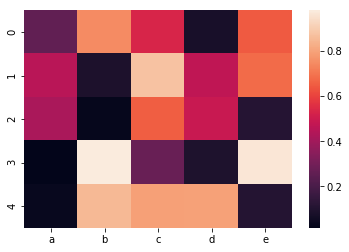

In [2]:
# 普通热图 Basic Heatmap
# Create a dataset (fake) 制作5行5列的矩阵
df = pd.DataFrame(np.random.random((5,5)), columns=["a","b","c","d","e"])
# 显示数据
df
# Default heatmap: just a visualization of this square matrix 默认热力图
p1 = sns.heatmap(df)

,a,b,c,d,e
0,0.447492,0.083233,0.054378,0.528246,0.839064
1,0.966619,0.718003,0.584444,0.454353,0.319515
2,0.165938,0.500661,0.221050,0.304151,0.470321
3,0.012819,0.206002,0.317296,0.998902,0.546637
4,0.168106,0.935917,0.081234,0.652118,0.988459


,a,b,c,d,e
a,1.000000,0.062998,0.219805,0.095833,0.160799
b,0.062998,1.000000,0.173022,0.040480,-0.101984
c,0.219805,0.173022,1.000000,-0.049702,-0.066863
d,0.095833,0.040480,-0.049702,1.000000,0.179716
e,0.160799,-0.101984,-0.066863,0.179716,1.000000


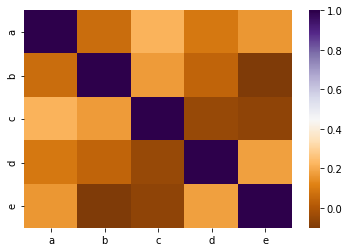

In [3]:
# 相关矩阵热图 Correlation matrix
# 一个常见的任务是检查某些变量是否相关可以轻松计算每对变量之间的相关性，并将其绘制为热图，发现哪个变量彼此相关。
# Create a dataset (fake) 创建数据
df = pd.DataFrame(np.random.random((100,5)), columns=["a","b","c","d","e"])
df.head()
# Calculate correlation between each pair of variable 计算相关系数
corr_matrix=df.corr()
# 显示相关系数结果
corr_matrix
# plot it 绘图 cmap设定颜色版
sns.heatmap(corr_matrix, cmap='PuOr')

(array([0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4], dtype=int64),
 array([0, 1, 2, 3, 4, 1, 2, 3, 4, 2, 3, 4, 3, 4, 4], dtype=int64))

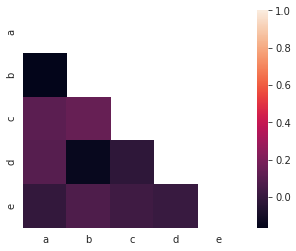

In [4]:
# 相关矩阵半热图 an half heatmap of correlation matrix
# Create a dataset (fake) 建立数据
df = pd.DataFrame(np.random.random((100,5)), columns=["a","b","c","d","e"])
# Calculate correlation between each pair of variable 计算相关系数
corr_matrix=df.corr()
# Can be great to plot only a half matrix 创建一个corr_matrix等大的O矩阵
mask = np.zeros_like(corr_matrix)
# np.triu_indices_from(mask)返回矩阵上三角形的索引
indices=np.triu_indices_from(mask)
# 显示索引结果
indices
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    # mask设置具有缺失值的单元格将自动被屏蔽；square使每个单元格为正方形
    p2 = sns.heatmap(corr_matrix, mask=mask, square=True)

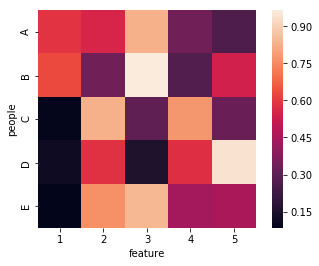

In [5]:
# 多数据热力图制作 Basic Heatmap of long format data
# 创建两个函数列表
people=np.repeat(("A","B","C","D","E"),5)
feature=list(range(1,6))*5
value=np.random.random(25)
# 创建表格
df=pd.DataFrame({'feature': feature, 'people': people, 'value': value })
 
# plot it 创建透视表
df_wide=df.pivot_table( index='people', columns='feature', values='value' )
p2=sns.heatmap( df_wide, square=True)

## 2. 热图外观设定 Customize seaborn heatmap
+ 单元格值的显示 Annotate each cell with value
+ 自定义网格线 Custom grid lines
+ 轴的显示 Remove X or Y labels
+ 标签隐藏 Hide a few axis labels to avoid overlapping
+ 颜色条坐标显示范围设置 Coordinate range setting of color bar

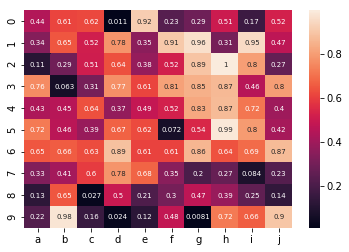

In [6]:
# Create a dataset (fake)
df = pd.DataFrame(np.random.random((10,10)), columns=["a","b","c","d","e","f","g","h","i","j"])
# annot_kws设置各个单元格中的值，size设定大小
sns.heatmap(df, annot=True, annot_kws={"size": 7});

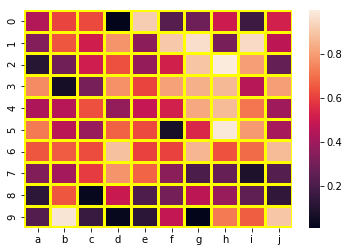

In [7]:
# 自定义网格线 Custom grid lines
sns.heatmap(df, linewidths=2, linecolor='yellow');

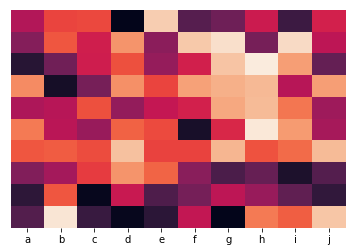

In [8]:
# 轴的显示 Remove X or Y labels
# 由xticklables和yticklabels控制坐标轴，cbar控制颜色条的显示
sns.heatmap(df, yticklabels=False, cbar=False);

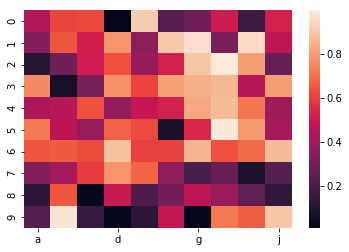

In [9]:
# 标签隐藏 Hide a few axis labels to avoid overlapping
# xticklabels表示标签index为该值倍数时显示
sns.heatmap(df, xticklabels=3);

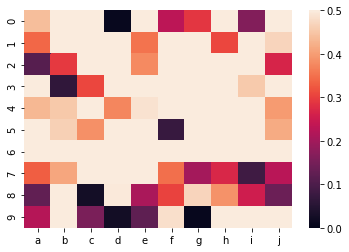

In [10]:
# 颜色条坐标显示范围设置 Coordinate range setting of color bar
sns.heatmap(df, vmin=0, vmax=0.5);

## 3. 热图上使用标准化 Use normalization on heatmap
+ 列的规范化 Column normalization
+ 行的规范化 Row normalization  

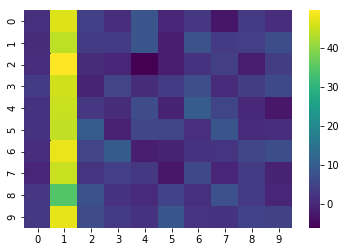

In [11]:
# 列的规范化 Column normalization
# 有时矩阵某一列值远远高于其他列的值，导致整体热图各点颜色趋于两级，需要对列的数据进行规范化的
# Create a dataframe where the average value of the second column is higher:
df = pd.DataFrame(np.random.randn(10,10) * 4 + 3)
# 使得第一列数据明显大于其他列
df[1]=df[1]+40
# If we do a heatmap, we just observe that a column as higher values than others: 没有规范化的热力图
sns.heatmap(df, cmap='viridis');

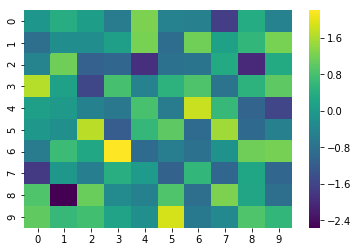

In [12]:
# Now if we normalize it by column 规范化列
df_norm_col=(df-df.mean())/df.std()
sns.heatmap(df_norm_col, cmap='viridis');

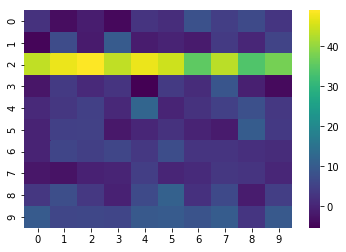

In [13]:
# 行的规范化 Row normalization  
# 列的规范化相同的原理适用于行规范化。
# Create a dataframe where the average value of the second row is higher
df = pd.DataFrame(np.random.randn(10,10) * 4 + 3)
df.iloc[2]=df.iloc[2]+40
 
# If we do a heatmap, we just observe that a row has higher values than others: 第2行的数据明显大于其他行
sns.heatmap(df, cmap='viridis');

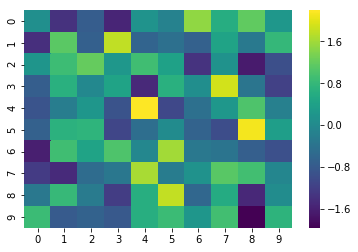

In [14]:
# 1: substract mean 行的规范化
df_norm_row=df.sub(df.mean(axis=1), axis=0)
# 2: divide by standard dev
df_norm_row=df_norm_row.div( df.std(axis=1), axis=0 )
# And see the result
sns.heatmap(df_norm_row, cmap='viridis');

## 4. 树状图与热图 Dendrogram with heatmap
+ 基础树状图与热图绘制 Dendrogram with heat map and coloured leaves
+ 树形图与热图规范化 normalize of Dendrogram with heatmap
+ 树形图与热图距离参数设定 distance of Dendrogram with 
+ 树形图与热图聚类方法参数设定 cluster method of Dendrogram with heatmap
+ 图像颜色设定 Change color palette 
+ 离群值设置 outliers set

树状图就是层次聚类的表现形式。层次聚类的合并算法通过计算两类数据点间的相似性，对所有数据点中最为相似的两个数据点进行组合，并反复迭代这一过程。简单的说层次聚类的合并算法是通过计算每一个类别的数据点与所有数据点之间的距离来确定它们之间的相似性，距离越小，相似度越高。并将距离最近的两个数据点或类别进行组合，生成聚类树。在树状图中通过线条连接表示两类数据的距离。

In [15]:
# 基础树状图与热图绘制 Dendrogram with heat map and coloured leaves
from matplotlib import pyplot as plt
import pandas as pd

# 使用mtcars数据集，通过一些数字变量提供几辆汽车的性能参数。 
# Data set mtcars数据集 下载
url = 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')
# 横轴为汽车性能参数，纵轴为汽车型号
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


{6: 'orange', 4: 'yellow', 8: 'brown'}

model
Mazda RX4              orange
Mazda RX4 Wag          orange
Datsun 710             yellow
Hornet 4 Drive         orange
Hornet Sportabout       brown
Valiant                orange
Duster 360              brown
Merc 240D              yellow
Merc 230               yellow
Merc 280               orange
Merc 280C              orange
Merc 450SE              brown
Merc 450SL              brown
Merc 450SLC             brown
Cadillac Fleetwood      brown
Lincoln Continental     brown
Chrysler Imperial       brown
Fiat 128               yellow
Honda Civic            yellow
Toyota Corolla         yellow
Toyota Corona          yellow
Dodge Challenger        brown
AMC Javelin             brown
Camaro Z28              brown
Pontiac Firebird        brown
Fiat X1-9              yellow
Porsche 914-2          yellow
Lotus Europa           yellow
Ford Pantera L          brown
Ferrari Dino           orange
Maserati Bora           brown
Volvo 142E             yellow
Name: cyl, dtype: object

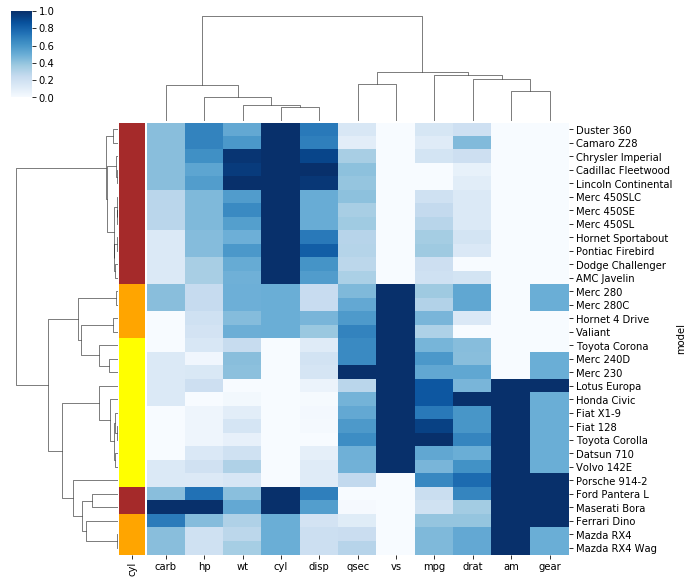

In [16]:
# Prepare a vector of color mapped to the 'cyl' column
# 设定发动机汽缸数6，4，,8指示不同的颜色
my_palette = dict(zip(df.cyl.unique(), ["orange","yellow","brown"]))
my_palette
# 列出不同汽车的发动机汽缸数
row_colors = df.cyl.map(my_palette)
row_colors
# metric数据度量方法, method计算聚类的方法
# standard_scale标准维度（0：行或1：列即每行或每列的含义，减去最小值并将每个维度除以其最大值）
sns.clustermap(df, metric="correlation", method="single", cmap="Blues", standard_scale=1, row_colors=row_colors)

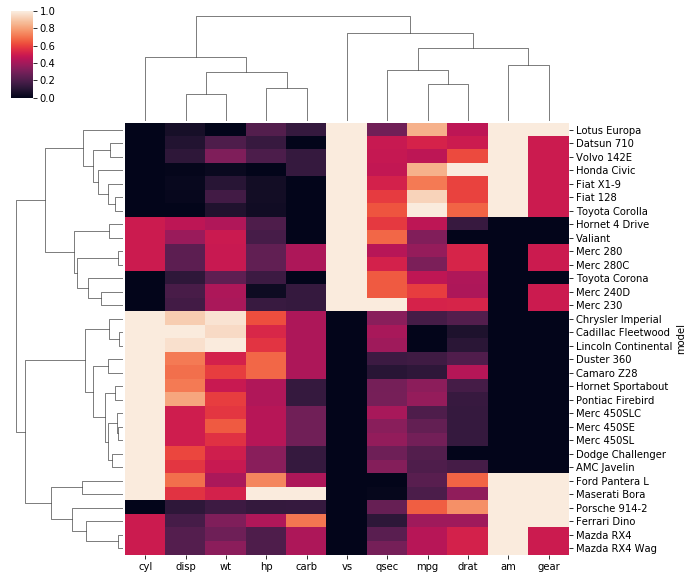

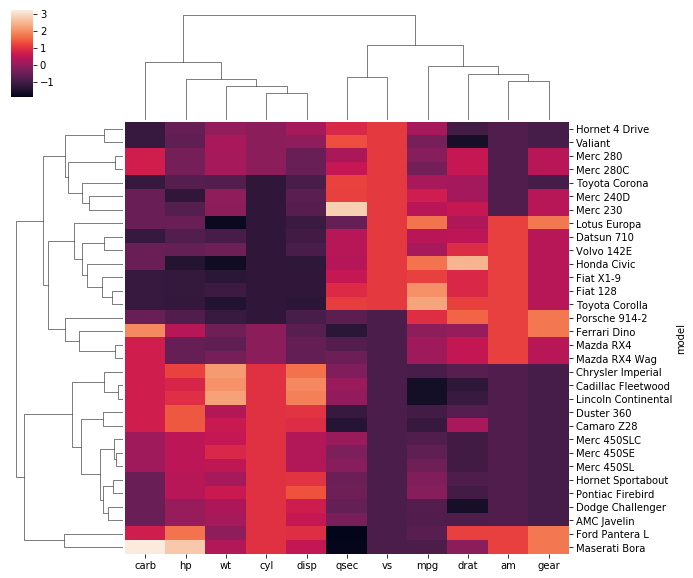

In [17]:
# 树形图与热图规范化 normalize of Dendrogram with heatmap
# Standardize or Normalize every column in the figure
# Standardize 标准化
sns.clustermap(df, standard_scale=1)
# Normalize 正则化
sns.clustermap(df, z_score=1)

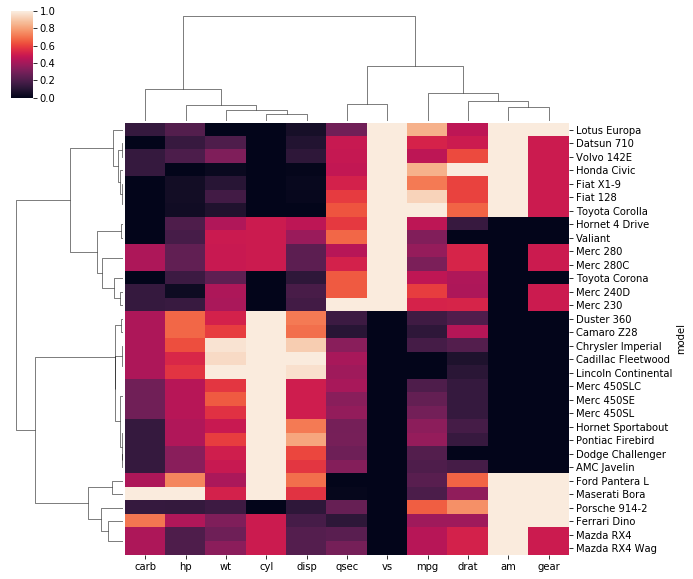

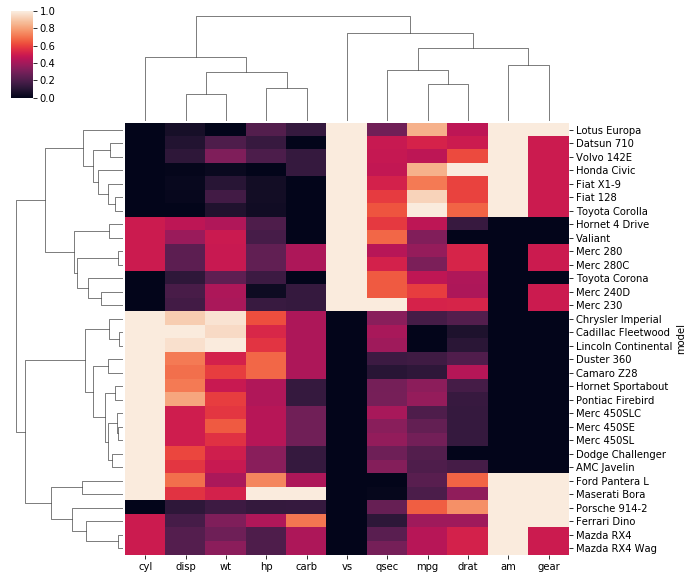

In [18]:
# 树形图与热图距离参数设定 distance of Dendrogram with heatmap
# 相似性
sns.clustermap(df, metric="correlation", standard_scale=1)
# 欧几里得距离
sns.clustermap(df, metric="euclidean", standard_scale=1)

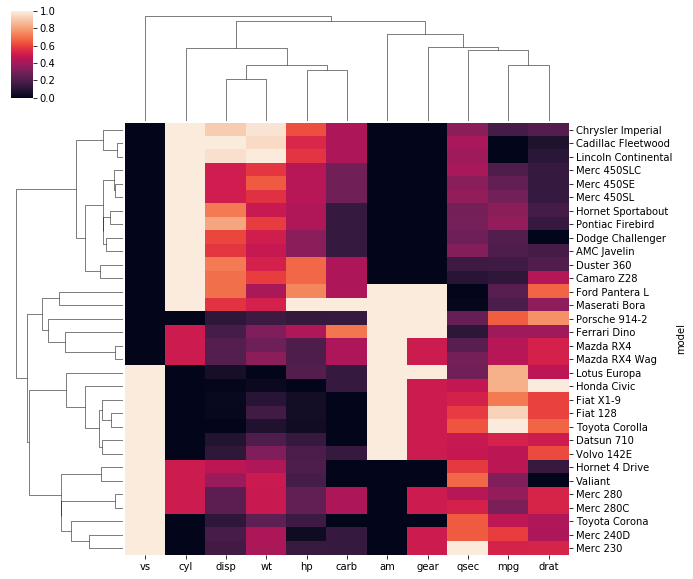

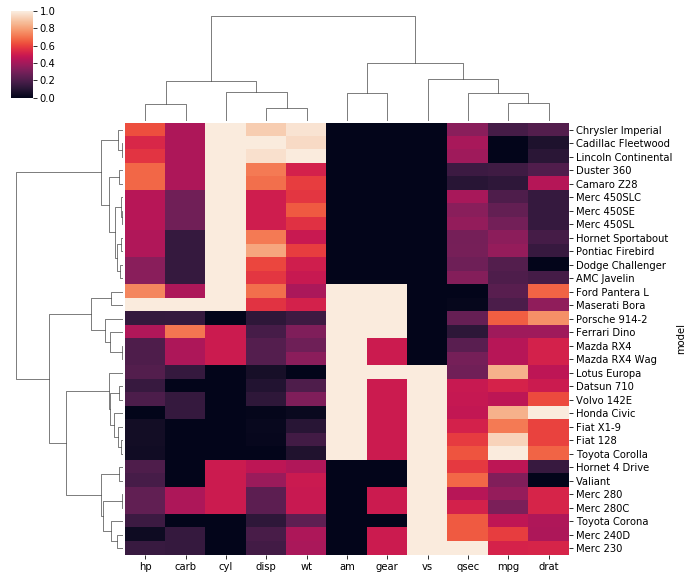

In [19]:
# 树形图与热图聚类方法参数设定 cluster method of Dendrogram with heatmap
# single-linkage算法
sns.clustermap(df, metric="euclidean", standard_scale=1, method="single")
# 聚类分析法ward，推荐使用
sns.clustermap(df, metric="euclidean", standard_scale=1, method="ward")

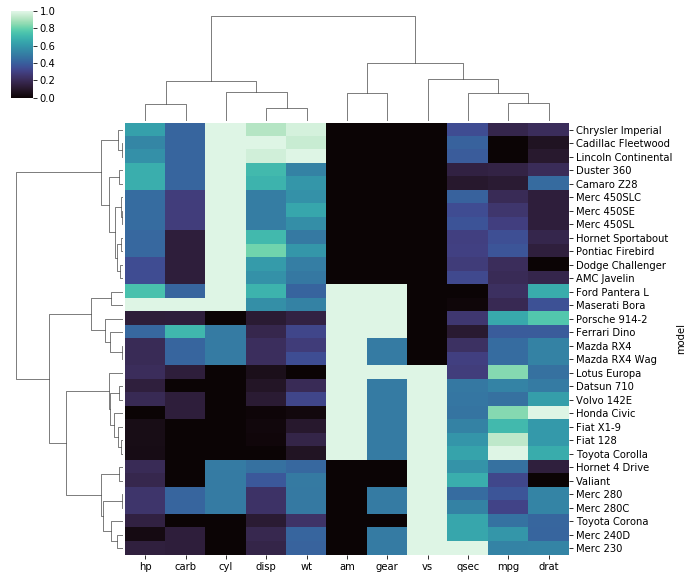

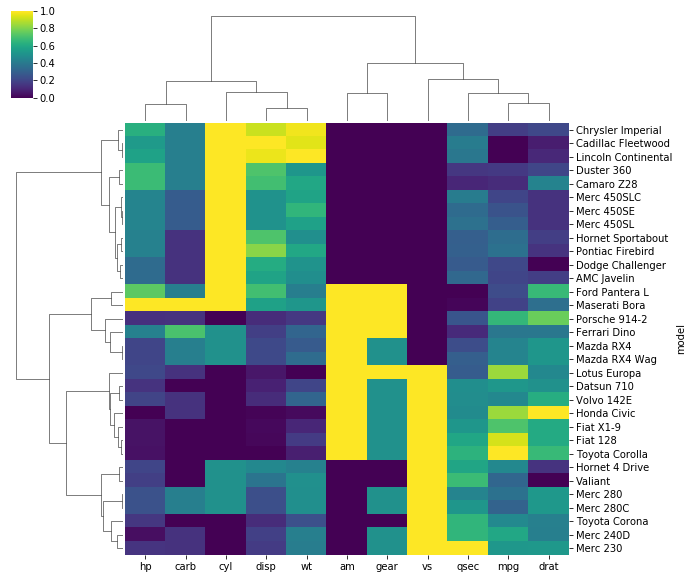

In [20]:
# 图像颜色设定 Change color palette 
sns.clustermap(df, metric="euclidean", standard_scale=1, method="ward", cmap="mako")
sns.clustermap(df, metric="euclidean", standard_scale=1, method="ward", cmap="viridis")

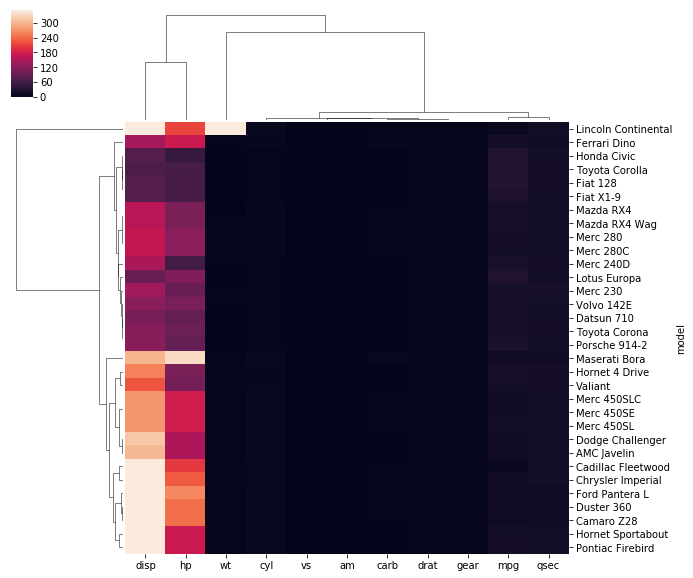

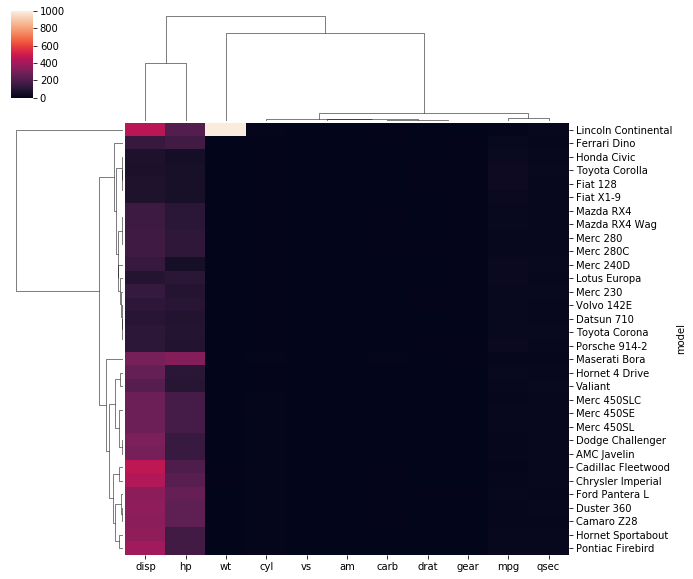

In [21]:
# 离群值设置 outliers set
# Ignore outliers
# Let's create an outlier in the dataset, 添加离群值
df.iloc[15,5] = 1000
# use the outlier detection 计算时忽略离群值
sns.clustermap(df, robust=True)
# do not use it 不忽略离群值
sns.clustermap(df, robust=False)